# HOUSING PRICES COMPETITION

### WHAT WE USE:
* *"Pipeline"* as a pipeline
* *"mean_absolute_error"* as a metric function
* *"DecisionTreeRegressor"* as a solution model
* *"SimpleImputer"* as an imputer of missing data
* *"ColumnTransformer"* as a combinator of pipelines
* *"OneHotEncoder"* as a decoder of categorical variables
* *"OrdinalEncoder"* as a decoder of ranked categorical variables
* *"cross_val_score"* as a comparator of models with different parameters

#### PREPARE PROJECT

In [1]:
# The module for manipulating with the data
import pandas as pd

# The module for drawing plots
import seaborn as sns

# The module of setting plot area
import matplotlib.pyplot as plt

In [2]:
# The function to disable notebooks warnings
from warnings import filterwarnings

# The pipeline for optimizing project code and work
from sklearn.pipeline import Pipeline

# The imputer for quick filling data
from sklearn.impute import SimpleImputer

# The transformer for merging pipelines
from sklearn.compose import ColumnTransformer

# The model for regression task
from sklearn.tree import DecisionTreeRegressor

# The project metric
from sklearn.metrics import mean_absolute_error

# The models for converting categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# The cross-validation model
from sklearn.model_selection import cross_val_score

In [3]:
# Disable warnings
filterwarnings("ignore")

# The locations of data
test_path = "../test_data.csv"
train_path = "../train_data.csv"

# Set dimension of plots
sns.set(rc={'figure.figsize':(8, 4)})

# Prepare display settings
pd.option_context("display.max_rows", 100)
pd.option_context("display.max_columns", 100);

#### LOAD DATA

In [4]:
# Clone data to dataframe and use house id as index
test_dataframe = pd.read_csv(test_path, index_col="Id")
train_dataframe = pd.read_csv(train_path, index_col="Id")
pipeline_test_dataframe = pd.read_csv(test_path, index_col="Id")
pipeline_train_dataframe = pd.read_csv(train_path, index_col="Id")

#### PRIMARY WORK WITH DATA

In [5]:
# Check train dataframe
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Cut the target feature
Y = train_dataframe.SalePrice.copy()

# Drop columns which have to many miss values (and target column for training dataset)
test_dataframe.drop(columns=["Alley", "PoolQC", "MiscFeature", "Fence", "FireplaceQu"], inplace=True)
train_dataframe.drop(columns=["Alley", "PoolQC", "MiscFeature", "Fence", "FireplaceQu", "SalePrice"], inplace=True)

In [7]:
# Check dataframe after removing columns
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
# Take important features
features = [
            "MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street", "LandContour", "Utilities", "LotConfig", 
            "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", 
            "YearBuilt", "YearRemodAdd", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", 
            "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
            "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "Heating", "HeatingQC", 
            "CentralAir", "Electrical", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", 
            "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd",
            "Functional", "Fireplaces", "GarageType", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", 
            "GarageCond", "PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
            "PoolArea", "MiscVal", "MoSold", "YrSold", "SaleType", "SaleCondition" 
           ]

# Take samples with necessary data columns
test_dataframe = test_dataframe[features].copy()
train_dataframe = train_dataframe[features].copy()

In [9]:
# Check again dataframe
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofMatl       1460 non-null   object 
 18  Exterior

#### WORK WITH MISSING VALUE

In [10]:
# Check columns with NaN values
nan_columns = [column for column in train_dataframe.columns if train_dataframe[column].isnull().any()]

In [11]:
# Check only columns with NaN
train_dataframe[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(2), object(11)
memory usage: 159.7+ KB


In [12]:
# Take numerical and categorical columns with NaN values
categorical_nan_columns = pd.DataFrame(train_dataframe[nan_columns].select_dtypes(include=["object"]).copy())
numerical_nan_columns = pd.DataFrame(train_dataframe[nan_columns].select_dtypes(include=["float64", "int64"]).copy())

# Delete columns with NaN value in train dataframe
train_dataframe.drop(columns=nan_columns, axis=1, inplace=True)

#### WORK WITH NUMERICAL DATA

In [13]:
# Check numerical data 
numerical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


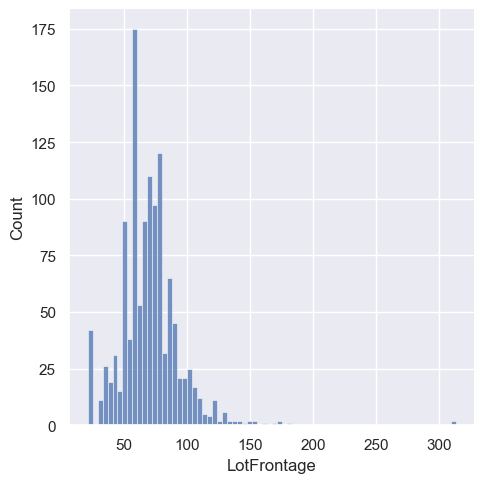

In [14]:
# Check the form of feature distribution
sns.displot(numerical_nan_columns.LotFrontage);

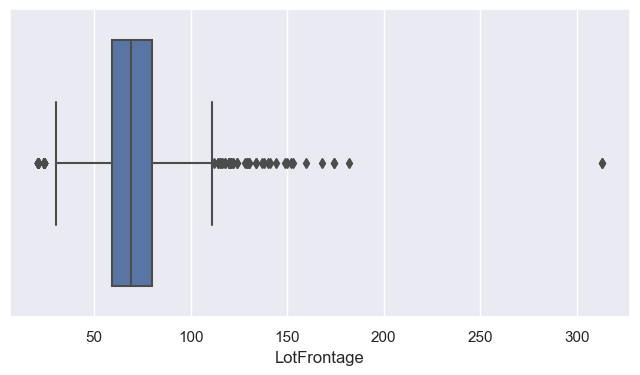

In [15]:
# Check extreme values on boxplot
sns.boxplot(x=numerical_nan_columns.LotFrontage);

In [16]:
# Check mean and variance of numerical data
numerical_nan_columns.describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


In [17]:
# We have normal percent of missing value, distribution isn't normal, many emissions values and normal variance. 
# It means that we need to use imputation with median value.

# Fill all NaN entities
numerical_nan_columns.LotFrontage.fillna(numerical_nan_columns.LotFrontage.dropna().median(), inplace=True)

In [18]:
# Check updated column
numerical_nan_columns.LotFrontage.info()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


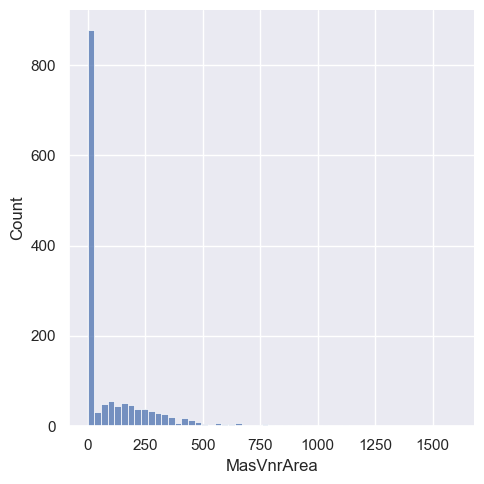

In [19]:
# Check distributions another of numerical feature
sns.displot(numerical_nan_columns.MasVnrArea);

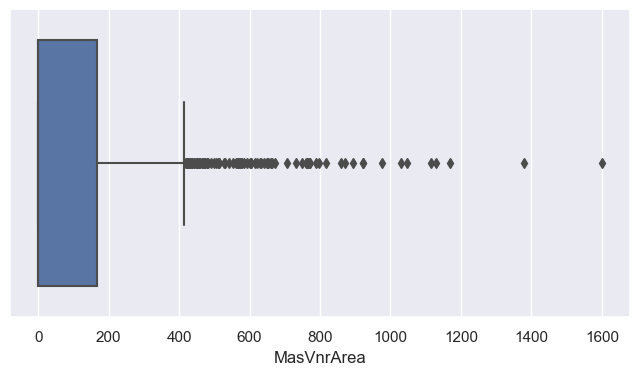

In [20]:
# Check extreme values of feature on boxplot
sns.boxplot(x=numerical_nan_columns.MasVnrArea);

In [21]:
# In this case we need to use external imputation with mode value of feature.

# Create column of flag of feature missing values
numerical_nan_columns["MasVnrAreaFlag"] = numerical_nan_columns.MasVnrArea.isnull().astype(int)

# Fill NaN column
numerical_nan_columns.MasVnrArea.fillna(0, inplace=True)

In [22]:
# Check that we plug NaN numerical values
numerical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1460 non-null   float64
 1   MasVnrArea      1460 non-null   float64
 2   MasVnrAreaFlag  1460 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 39.9 KB


#### WORK WITH CATEGORICAL DATA

In [23]:
# Check categorical data with NaN values
categorical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   Electrical    1459 non-null   object
 7   GarageType    1379 non-null   object
 8   GarageFinish  1379 non-null   object
 9   GarageQual    1379 non-null   object
 10  GarageCond    1379 non-null   object
dtypes: object(11)
memory usage: 136.9+ KB


In [24]:
# Check categorical feature distribution
categorical_nan_columns.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
# Check categorical feature distribution
categorical_nan_columns.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [26]:
# Check categorical feature distribution
categorical_nan_columns.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
# Check categorical feature distribution
categorical_nan_columns.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [28]:
# Check categorical feature distribution
categorical_nan_columns.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [29]:
# Check categorical feature distribution
categorical_nan_columns.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [30]:
# Check categorical feature distribution
categorical_nan_columns.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
# Check categorical feature distribution
categorical_nan_columns.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [32]:
# Check categorical feature distribution
categorical_nan_columns.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [33]:
# Check categorical feature distribution
categorical_nan_columns.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [34]:
# Check categorical feature distribution
categorical_nan_columns.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [35]:
# The columns which we fill by new value
unknown_categories = ["BsmtQual", "BsmtFinType1", "GarageFinish"]

# The columns which we fill by the most frequent value (because the most frequent value dominate in their distribution)
dominate_categories = [
                        "MasVnrType", "BsmtCond", "BsmtExposure", "BsmtFinType2", "Electrical", "GarageType", 
                        "GarageQual", "GarageCond"
                      ]

# Filling categorical NaN columns
[categorical_nan_columns[column].fillna("Unknown", inplace=True) for column in unknown_categories]
[categorical_nan_columns[column].fillna(categorical_nan_columns[column].value_counts().index[0], 
                                                   inplace=True) for column in dominate_categories];

In [36]:
# Check that we put the data
categorical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1460 non-null   object
 1   BsmtQual      1460 non-null   object
 2   BsmtCond      1460 non-null   object
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinType1  1460 non-null   object
 5   BsmtFinType2  1460 non-null   object
 6   Electrical    1460 non-null   object
 7   GarageType    1460 non-null   object
 8   GarageFinish  1460 non-null   object
 9   GarageQual    1460 non-null   object
 10  GarageCond    1460 non-null   object
dtypes: object(11)
memory usage: 136.9+ KB


In [37]:
# Full prepare training data
train_dataframe = pd.concat([train_dataframe, categorical_nan_columns, numerical_nan_columns], axis=1).copy()

In [38]:
# Check train data
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotArea         1460 non-null   int64  
 3   Street          1460 non-null   object 
 4   LandContour     1460 non-null   object 
 5   Utilities       1460 non-null   object 
 6   LotConfig       1460 non-null   object 
 7   Neighborhood    1460 non-null   object 
 8   Condition1      1460 non-null   object 
 9   Condition2      1460 non-null   object 
 10  BldgType        1460 non-null   object 
 11  HouseStyle      1460 non-null   object 
 12  OverallQual     1460 non-null   int64  
 13  OverallCond     1460 non-null   int64  
 14  YearBuilt       1460 non-null   int64  
 15  YearRemodAdd    1460 non-null   int64  
 16  RoofMatl        1460 non-null   object 
 17  Exterior1st     1460 non-null   o

#### SEPARATE PROCESSING

In [39]:
# Take numerical data
numerical_data = train_dataframe.select_dtypes(include=["float64", "int64"]).copy()

In [40]:
# Check numerical data
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [41]:
# Take categorical data
categorical_data = train_dataframe.select_dtypes(include=["object"]).copy()

In [42]:
# Check numerical data
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LandContour    1460 non-null   object
 3   Utilities      1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition1     1460 non-null   object
 7   Condition2     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofMatl       1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  ExterQual      1460 non-null   object
 14  ExterCond      1460 non-null   object
 15  Foundation     1460 non-null   object
 16  Heating        1460 non-null   object
 17  HeatingQC      1460 non-null   object
 18  CentralAir     1460 non-null

#### ENCODING CATEGORICAL FEATURES

In [43]:
# Columns which we must be deleted because we can't preprocess them (need one-hot, but has more than 15 unique values)
drop_columns = ["Neighborhood", "Exterior1st", "Exterior2nd"]

# Columns for ordinary encoding
ordinar_columns = [
                    "LandContour", "Utilities", "BldgType", "HouseStyle", "ExterQual", "ExterCond", "HeatingQC", 
                    "CentralAir", "KitchenQual", "Functional", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                    "BsmtFinType2", "GarageFinish", "GarageQual", "GarageCond"
                  ]

# Columns for one-hot encoding
onehot_columns = [
                    "MSZoning", "Street", "LotConfig", "Condition1", "Condition2", "RoofMatl", "Foundation", "Heating",
                    "PavedDrive", "SaleType", "SaleCondition", "MasVnrType", "Electrical", "GarageType"
                 ]

# Drop columns
categorical_data.drop(drop_columns, inplace=True, axis=1)

In [44]:
# Check new updated categorical data
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LandContour    1460 non-null   object
 3   Utilities      1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   Condition1     1460 non-null   object
 6   Condition2     1460 non-null   object
 7   BldgType       1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  ExterQual      1460 non-null   object
 11  ExterCond      1460 non-null   object
 12  Foundation     1460 non-null   object
 13  Heating        1460 non-null   object
 14  HeatingQC      1460 non-null   object
 15  CentralAir     1460 non-null   object
 16  KitchenQual    1460 non-null   object
 17  Functional     1460 non-null   object
 18  PavedDrive     1460 non-null

#### ORDINAR ENCODING

In [45]:
# Create model for ordinar decoding
ordinar_encoder = OrdinalEncoder()

# Encode the categorical variables
categorical_data[ordinar_columns] = ordinar_encoder.fit_transform(categorical_data[ordinar_columns])

In [46]:
# Check encoded data
categorical_data[ordinar_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandContour   1460 non-null   float64
 1   Utilities     1460 non-null   float64
 2   BldgType      1460 non-null   float64
 3   HouseStyle    1460 non-null   float64
 4   ExterQual     1460 non-null   float64
 5   ExterCond     1460 non-null   float64
 6   HeatingQC     1460 non-null   float64
 7   CentralAir    1460 non-null   float64
 8   KitchenQual   1460 non-null   float64
 9   Functional    1460 non-null   float64
 10  BsmtQual      1460 non-null   float64
 11  BsmtCond      1460 non-null   float64
 12  BsmtExposure  1460 non-null   float64
 13  BsmtFinType1  1460 non-null   float64
 14  BsmtFinType2  1460 non-null   float64
 15  GarageFinish  1460 non-null   float64
 16  GarageQual    1460 non-null   float64
 17  GarageCond    1460 non-null   float64
dtypes: float64(18)
memory usage:

#### ONE-HOT ENCODING

In [47]:
# One-hot encoding model with parameters
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Encode data
OH_data = onehot_encoder.fit_transform(categorical_data[onehot_columns])

# Prepare for concatenation
OH_data = pd.DataFrame(OH_data).copy()

# Make column names string
OH_data.columns = OH_data.columns.astype(str)

In [48]:
# Check encoded data
OH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1460 non-null   float64
 2   2       1460 non-null   float64
 3   3       1460 non-null   float64
 4   4       1460 non-null   float64
 5   5       1460 non-null   float64
 6   6       1460 non-null   float64
 7   7       1460 non-null   float64
 8   8       1460 non-null   float64
 9   9       1460 non-null   float64
 10  10      1460 non-null   float64
 11  11      1460 non-null   float64
 12  12      1460 non-null   float64
 13  13      1460 non-null   float64
 14  14      1460 non-null   float64
 15  15      1460 non-null   float64
 16  16      1460 non-null   float64
 17  17      1460 non-null   float64
 18  18      1460 non-null   float64
 19  19      1460 non-null   float64
 20  20      1460 non-null   float64
 21  21      1460 non-null   float64
 22  

In [49]:
# Prepare index for concatination
OH_data.set_index(OH_data.index + 1, drop=False, inplace=True)

# Concat data parts
train_dataframe = pd.concat([numerical_data, categorical_data[ordinar_columns], OH_data], axis=1)

In [50]:
# Check training data
train_dataframe.head(-5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,72,73,74,75,76,77,78,79,80,81
1,60,8450,7,5,2003,2003,706,0,150,856,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,9600,6,8,1976,1976,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60,11250,7,5,2001,2002,486,0,434,920,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70,9550,7,5,1915,1970,216,0,540,756,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,60,14260,8,5,2000,2000,655,0,490,1145,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,90,9000,5,5,1974,1974,0,0,896,896,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1452,20,9262,8,5,2008,2009,0,0,1573,1573,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1453,180,3675,5,5,2005,2005,547,0,0,547,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1454,20,17217,5,5,2006,2006,0,0,1140,1140,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### WORK WITH MODEL

In [51]:
# The function for calculating score with settled depth
def get_depth(depth: int):
    model = DecisionTreeRegressor(
                                    random_state=0, 
                                    max_depth=depth,
                                    criterion="absolute_error"
                                 )

    return abs(cross_val_score(model, train_dataframe, Y, cv=10, scoring="neg_mean_absolute_error").mean())

# The function for searching model with the best depth
def get_best_depth():
    best_depth = 3
    best_score = get_depth(3)
    
    for depth in range(4, 10):
        temporary_score = get_depth(depth)
        
        if best_score > temporary_score:
            best_depth = depth
            best_score = temporary_score
    
    return best_depth

In [52]:
# The function for calculating score with settled min_samples_split
def get_min_samples_split(min_samples_split: int, depth: int):
    model = DecisionTreeRegressor(
                                    random_state=0, 
                                    max_depth=depth,
                                    criterion="absolute_error",
                                    min_samples_split=min_samples_split
                                 )

    return abs(cross_val_score(model, train_dataframe, Y, cv=10, scoring="neg_mean_absolute_error").mean())

# The function for searching model with the best min_sample_split
def get_best_min_samples_split(depth: int):
    best_min_samples_split = 4
    best_score = get_min_samples_split(4, depth)
    
    for min_samples_split in range(5, 25):
        temporary_score = get_min_samples_split(min_samples_split, depth)
        
        if best_score > temporary_score:
            best_score = temporary_score
            best_min_samples_split = min_samples_split
    
    return best_min_samples_split

In [53]:
# The function for calculating score with settled min_samples_leaf
def get_min_samples_leaf(min_samples_leaf: int, min_samples_split: int, depth: int):
    model = DecisionTreeRegressor(
                                    random_state=0, 
                                    max_depth=depth,
                                    criterion="absolute_error",
                                    min_samples_leaf=min_samples_leaf,
                                    min_samples_split=min_samples_split
                                 )

    return abs(cross_val_score(model, train_dataframe, Y, cv=10, scoring="neg_mean_absolute_error").mean())

# The function for searching model with the best min_sample_leaf
def get_best_min_samples_leaf(min_samples_split: int, depth: int):
    best_min_samples_leaf = 2
    best_score = get_min_samples_leaf(2, min_samples_split, depth)
    
    for min_samples_leaf in range(3, 11):
        temporary_score = get_min_samples_leaf(min_samples_leaf, min_samples_split, depth)
        
        if best_score > temporary_score:
            best_score = temporary_score
            best_min_samples_leaf = min_samples_leaf
    
    return best_min_samples_leaf

In [54]:
# To get the best parameters
def get_best_parameters():
    best_depth = get_best_depth()
    best_min_sample_split = get_best_min_samples_split(best_depth)
    best_min_samples_leaf = get_best_min_samples_leaf(best_min_sample_split, best_depth)
    
    return (best_depth, best_min_sample_split, best_min_samples_leaf)

# Get the best parameters
best_depth, best_min_sample_split, best_min_samples_leaf = get_best_parameters()

In [55]:
# Check them
print("best_depth = ", best_depth, ", best_min_sample_split = ", best_min_sample_split, 
      ", best_min_samples_leaf = ", best_min_samples_leaf, sep='')

best_depth = 7, best_min_sample_split = 16, best_min_samples_leaf = 10


#### FITTING AND PREDICT

In [56]:
# Create the model with the best params
model = DecisionTreeRegressor(
                                random_state=0,
                                max_depth=best_depth,
                                criterion="absolute_error",
                                min_samples_leaf=best_min_samples_leaf,
                                min_samples_split=best_min_sample_split
                             )

# Make the final fitting
model.fit(train_dataframe, Y);

#### PREPARE TEST DATA

In [57]:
# Check columns with NaN values
test_nan_columns = [column for column in test_dataframe.columns if test_dataframe[column].isnull().any()]

In [58]:
# Check only columns with NaN values
test_dataframe[test_nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Utilities     1457 non-null   object 
 3   Exterior1st   1458 non-null   object 
 4   Exterior2nd   1458 non-null   object 
 5   MasVnrType    1443 non-null   object 
 6   MasVnrArea    1444 non-null   float64
 7   BsmtQual      1415 non-null   object 
 8   BsmtCond      1414 non-null   object 
 9   BsmtExposure  1415 non-null   object 
 10  BsmtFinType1  1417 non-null   object 
 11  BsmtFinSF1    1458 non-null   float64
 12  BsmtFinType2  1417 non-null   object 
 13  BsmtFinSF2    1458 non-null   float64
 14  BsmtUnfSF     1458 non-null   float64
 15  TotalBsmtSF   1458 non-null   float64
 16  BsmtFullBath  1457 non-null   float64
 17  BsmtHalfBath  1457 non-null   float64
 18  KitchenQual   1458 non-nu

In [59]:
# Take numerical and categorical columns with NaN values
test_categorical_nan_columns = pd.DataFrame(test_dataframe[test_nan_columns].select_dtypes(include=["object"]).copy())
test_numerical_nan_columns = pd.DataFrame(test_dataframe[test_nan_columns].select_dtypes(include=["float64", "int64"]).copy())

# Delete columns with NaN value
test_dataframe.drop(columns=test_nan_columns, axis=1, inplace=True)

#### WORK WITH NUMERICAL TEST DATA

In [60]:
# Check numerical data 
test_numerical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   MasVnrArea    1444 non-null   float64
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   BsmtFullBath  1457 non-null   float64
 7   BsmtHalfBath  1457 non-null   float64
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(10)
memory usage: 125.4 KB


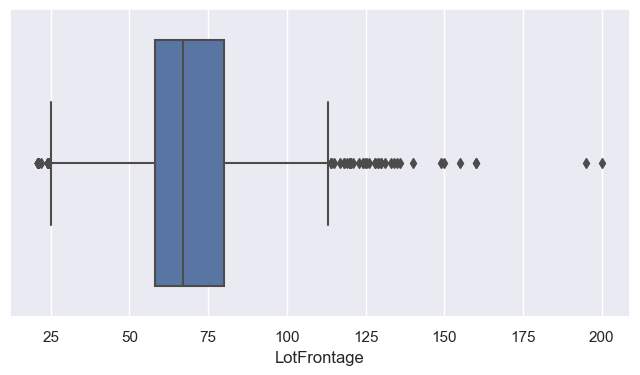

In [61]:
# Check extreme values on boxplot
sns.boxplot(x=test_numerical_nan_columns["LotFrontage"]);

In [62]:
# Check mean and variance of data
test_numerical_nan_columns.describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1458.000000,1458.000000
mean,68.580357,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1.766118,472.768861
std,22.376841,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,0.775945,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1.000000,318.000000
50%,67.000000,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,2.000000,480.000000
75%,80.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2.000000,576.000000
max,200.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,5.000000,1488.000000


In [63]:
# We suppose that training data have the same distribution

# Fill all NaN entities
test_numerical_nan_columns.LotFrontage.fillna(test_numerical_nan_columns.LotFrontage.dropna().median(), inplace=True)

In [64]:
# Check updated column
test_numerical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   MasVnrArea    1444 non-null   float64
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   BsmtFullBath  1457 non-null   float64
 7   BsmtHalfBath  1457 non-null   float64
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(10)
memory usage: 125.4 KB


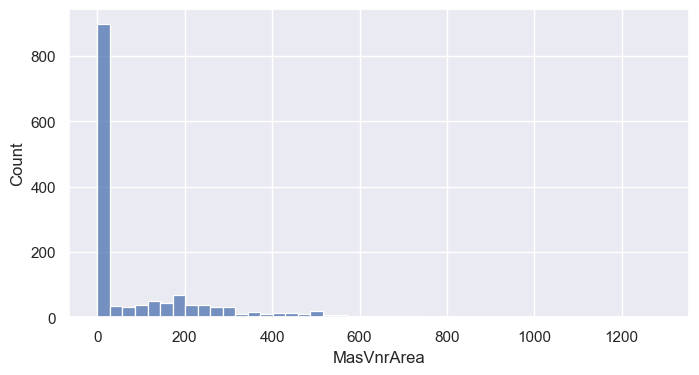

In [65]:
# Check another distributions of numerical column
sns.histplot(test_numerical_nan_columns["MasVnrArea"]);

In [66]:
# We suppose that training data have the same distribution

# Create column of flag of missing value
test_numerical_nan_columns["MasVnrAreaFlag"] = test_numerical_nan_columns.MasVnrArea.isnull().astype(int)

# Fill NaN entities
test_numerical_nan_columns.MasVnrArea.fillna(0, inplace=True)
[test_numerical_nan_columns[column].fillna(test_numerical_nan_columns[column].median(), inplace=True) 
             for column in test_numerical_nan_columns.columns];

In [67]:
# Check that we plug NaN numerical values
test_numerical_nan_columns[["LotFrontage", "MasVnrArea", "MasVnrAreaFlag"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1459 non-null   float64
 1   MasVnrArea      1459 non-null   float64
 2   MasVnrAreaFlag  1459 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 39.9 KB


#### WORK WITH CATEGORICAL TEST DATA

In [68]:
# Check updated columns
test_categorical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1455 non-null   object
 1   Utilities     1457 non-null   object
 2   Exterior1st   1458 non-null   object
 3   Exterior2nd   1458 non-null   object
 4   MasVnrType    1443 non-null   object
 5   BsmtQual      1415 non-null   object
 6   BsmtCond      1414 non-null   object
 7   BsmtExposure  1415 non-null   object
 8   BsmtFinType1  1417 non-null   object
 9   BsmtFinType2  1417 non-null   object
 10  KitchenQual   1458 non-null   object
 11  Functional    1457 non-null   object
 12  GarageType    1383 non-null   object
 13  GarageFinish  1381 non-null   object
 14  GarageQual    1381 non-null   object
 15  GarageCond    1381 non-null   object
 16  SaleType      1458 non-null   object
dtypes: object(17)
memory usage: 205.2+ KB


In [69]:
# Filling categorical NaN columns
[test_categorical_nan_columns[column].fillna(test_categorical_nan_columns[column].value_counts().index[0], 
                                                   inplace=True) for column in test_categorical_nan_columns];

In [70]:
# Check that we put the data
test_categorical_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1459 non-null   object
 1   Utilities     1459 non-null   object
 2   Exterior1st   1459 non-null   object
 3   Exterior2nd   1459 non-null   object
 4   MasVnrType    1459 non-null   object
 5   BsmtQual      1459 non-null   object
 6   BsmtCond      1459 non-null   object
 7   BsmtExposure  1459 non-null   object
 8   BsmtFinType1  1459 non-null   object
 9   BsmtFinType2  1459 non-null   object
 10  KitchenQual   1459 non-null   object
 11  Functional    1459 non-null   object
 12  GarageType    1459 non-null   object
 13  GarageFinish  1459 non-null   object
 14  GarageQual    1459 non-null   object
 15  GarageCond    1459 non-null   object
 16  SaleType      1459 non-null   object
dtypes: object(17)
memory usage: 205.2+ KB


In [71]:
# Full prepare training data
test_dataframe = pd.concat([test_dataframe, test_categorical_nan_columns, test_numerical_nan_columns], axis=1).copy()

In [72]:
# Check train data
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1459 non-null   int64  
 1   LotArea         1459 non-null   int64  
 2   Street          1459 non-null   object 
 3   LandContour     1459 non-null   object 
 4   LotConfig       1459 non-null   object 
 5   Neighborhood    1459 non-null   object 
 6   Condition1      1459 non-null   object 
 7   Condition2      1459 non-null   object 
 8   BldgType        1459 non-null   object 
 9   HouseStyle      1459 non-null   object 
 10  OverallQual     1459 non-null   int64  
 11  OverallCond     1459 non-null   int64  
 12  YearBuilt       1459 non-null   int64  
 13  YearRemodAdd    1459 non-null   int64  
 14  RoofMatl        1459 non-null   object 
 15  ExterQual       1459 non-null   object 
 16  ExterCond       1459 non-null   object 
 17  Foundation      1459 non-null 

In [73]:
# Take numerical data
test_numerical_data = test_dataframe.select_dtypes(include=["float64", "int64"]).copy()

In [74]:
# Check numerical data
test_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   1stFlrSF       1459 non-null   int64  
 7   2ndFlrSF       1459 non-null   int64  
 8   LowQualFinSF   1459 non-null   int64  
 9   GrLivArea      1459 non-null   int64  
 10  FullBath       1459 non-null   int64  
 11  HalfBath       1459 non-null   int64  
 12  BedroomAbvGr   1459 non-null   int64  
 13  KitchenAbvGr   1459 non-null   int64  
 14  TotRmsAbvGrd   1459 non-null   int64  
 15  Fireplaces     1459 non-null   int64  
 16  WoodDeckSF     1459 non-null   int64  
 17  OpenPorchSF    1459 non-null   int64  
 18  Enclo

In [75]:
# Take categorical data
test_categorical_data = test_dataframe.select_dtypes(include=["object"]).copy()

In [76]:
# Check categorical data
test_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Street         1459 non-null   object
 1   LandContour    1459 non-null   object
 2   LotConfig      1459 non-null   object
 3   Neighborhood   1459 non-null   object
 4   Condition1     1459 non-null   object
 5   Condition2     1459 non-null   object
 6   BldgType       1459 non-null   object
 7   HouseStyle     1459 non-null   object
 8   RoofMatl       1459 non-null   object
 9   ExterQual      1459 non-null   object
 10  ExterCond      1459 non-null   object
 11  Foundation     1459 non-null   object
 12  Heating        1459 non-null   object
 13  HeatingQC      1459 non-null   object
 14  CentralAir     1459 non-null   object
 15  Electrical     1459 non-null   object
 16  PavedDrive     1459 non-null   object
 17  SaleCondition  1459 non-null   object
 18  MSZoning       1459 non-n

In [77]:
# Drop columns
test_categorical_data.drop(drop_columns, inplace=True, axis=1)

In [78]:
# Check new updated categorical data
test_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Street         1459 non-null   object
 1   LandContour    1459 non-null   object
 2   LotConfig      1459 non-null   object
 3   Condition1     1459 non-null   object
 4   Condition2     1459 non-null   object
 5   BldgType       1459 non-null   object
 6   HouseStyle     1459 non-null   object
 7   RoofMatl       1459 non-null   object
 8   ExterQual      1459 non-null   object
 9   ExterCond      1459 non-null   object
 10  Foundation     1459 non-null   object
 11  Heating        1459 non-null   object
 12  HeatingQC      1459 non-null   object
 13  CentralAir     1459 non-null   object
 14  Electrical     1459 non-null   object
 15  PavedDrive     1459 non-null   object
 16  SaleCondition  1459 non-null   object
 17  MSZoning       1459 non-null   object
 18  Utilities      1459 non-n

In [79]:
# Encode the categorical variables
test_categorical_data[ordinar_columns] = ordinar_encoder.transform(test_categorical_data[ordinar_columns])

In [80]:
# Check encoded data
test_categorical_data[ordinar_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandContour   1459 non-null   float64
 1   Utilities     1459 non-null   float64
 2   BldgType      1459 non-null   float64
 3   HouseStyle    1459 non-null   float64
 4   ExterQual     1459 non-null   float64
 5   ExterCond     1459 non-null   float64
 6   HeatingQC     1459 non-null   float64
 7   CentralAir    1459 non-null   float64
 8   KitchenQual   1459 non-null   float64
 9   Functional    1459 non-null   float64
 10  BsmtQual      1459 non-null   float64
 11  BsmtCond      1459 non-null   float64
 12  BsmtExposure  1459 non-null   float64
 13  BsmtFinType1  1459 non-null   float64
 14  BsmtFinType2  1459 non-null   float64
 15  GarageFinish  1459 non-null   float64
 16  GarageQual    1459 non-null   float64
 17  GarageCond    1459 non-null   float64
dtypes: float64(18)
memory usa

In [81]:
# Encode data
test_OH_data = onehot_encoder.transform(test_categorical_data[onehot_columns])

# Prepare for concatenation and check
test_OH_data = pd.DataFrame(test_OH_data).copy()

# Make columns name string
test_OH_data.columns = test_OH_data.columns.astype(str)

In [82]:
# Check encoded data
test_OH_data.head(-5)

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1450,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1451,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1452,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
# Prepare index for concatination
test_OH_data.set_index(test_OH_data.index + 1461, drop=False, inplace=True)

# Concat data parts
test_dataframe = pd.concat([test_numerical_data, test_categorical_data[ordinar_columns], test_OH_data], axis=1)

In [84]:
# Check data
test_dataframe.head(-5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,72,73,74,75,76,77,78,79,80,81
1461,20,11622,5,6,1961,1961,896,0,0,896,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1462,20,14267,6,6,1958,1958,1329,0,0,1329,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1463,60,13830,5,5,1997,1998,928,701,0,1629,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1464,60,9978,6,6,1998,1998,926,678,0,1604,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1465,120,5005,8,5,1992,1992,1280,0,0,1280,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,180,1470,4,6,1970,1970,630,0,0,630,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2911,160,1484,4,4,1972,1972,546,546,0,1092,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2912,20,13384,5,5,1969,1979,1360,0,0,1360,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2913,160,1533,4,5,1970,1970,546,546,0,1092,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### MAKE PREDICTIONS

In [85]:
# Make final prediction
predictions = model.predict(test_dataframe[train_dataframe.columns])

In [86]:
# Create the submission Ids
submission_ids = pd.Series(range(1460, 2919))

In [87]:
# Check ids
submission_ids.shape

(1459,)

In [88]:
# Create submission dataframe
submisson_dataframe = pd.DataFrame(
                                    {
                                        "Id": submission_ids,
                                        "SalePrice": predictions
                                    }
                                 )

# Change ids
submisson_dataframe.Id += 1

In [89]:
# Check the result
submisson_dataframe.head(-5)

,Id,SalePrice
0,1461,125500.0
1,1462,147750.0
2,1463,204500.0
3,1464,178450.0
4,1465,248000.0
...,...,...
1449,2910,87500.0
1450,2911,110000.0
1451,2912,161500.0
1452,2913,87500.0


In [90]:
# Create a submission file
submisson_dataframe.to_csv("submission.csv", index=False,)

#### WORK WITH PIPELINE

In [91]:
# Preprocessing pipeline for numerical data
numerical_transformer = SimpleImputer(strategy="median")

# Preprocessing pipeline for categorical data
categorical_imputer = SimpleImputer(strategy="most_frequent")

# Preprocessing for categorical one-hot data
OH_categorical_transformer = Pipeline(steps=[
                                                ("filling", categorical_imputer),
                                                ("one_hot_encoding", onehot_encoder)
                                            ])

# Preprocessing for categorical ordinar encoding data
OE_categorical_transformer = Pipeline(steps=[
                                                ("filling", categorical_imputer), 
                                                ("one_hot_encoding", ordinar_encoder)])

In [92]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
                                    transformers=[
                                                    ("OH_categories", OH_categorical_transformer, onehot_columns),
                                                    ("OE_categories", OE_categorical_transformer, ordinar_columns),
                                                    ("numerical_data", numerical_transformer, numerical_data.columns)
                                                 ])

In [93]:
# Create final pipeline
final_pipeline = Pipeline(steps=[
                                    ("preprocessor", preprocessor),
                                    ("model", model)
                                ])

# Preprocessing of training data, fit model 
final_pipeline.fit(pipeline_train_dataframe, Y);

#### PIPELINE PREDICTIONS

In [94]:
# Maiden prediction by pipeline
pipeline_prediction = final_pipeline.predict(pipeline_test_dataframe)

In [95]:
# Check pipeline predictions
pipeline_prediction

array([125500., 147750., 204500., ..., 161500.,  95250., 250000.])